In [22]:
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [23]:
from numpy.random import seed
seed(1)

from tensorflow import random
random.set_seed(2)

In [24]:
# load csv into dataframe
df = pd.read_csv(
    Path('../data/stocks_history.csv'),
    index_col='Unnamed: 0',
    infer_datetime_format=True,
    parse_dates=True
)
df.head()

,MSFT_open,MSFT_high,MSFT_low,MSFT_close,AAPL_open,AAPL_high,AAPL_low,AAPL_close,TSLA_open,TSLA_high,...,JNJ_low,JNJ_close,REGN_open,REGN_high,REGN_low,REGN_close,GILD_open,GILD_high,GILD_low,GILD_close
2010-06-29,24.13,24.20,23.110,23.31,264.1205,264.39,254.30,256.17,19.00,25.0000,...,58.680,59.24,23.67,23.95,22.86,22.98,35.40,35.61,34.740,34.97
2010-06-30,23.30,23.68,22.950,23.01,256.7100,257.97,250.01,251.53,25.79,30.4192,...,58.940,59.06,23.05,23.47,22.32,22.32,34.83,35.13,34.260,34.28
2010-07-01,23.09,23.32,22.730,23.16,254.3000,254.80,243.22,248.48,25.00,25.9200,...,58.650,59.07,22.31,22.37,20.45,20.79,34.24,34.27,33.300,34.14
2010-07-02,23.36,23.48,23.050,23.27,250.4900,250.93,243.20,246.94,23.00,23.1000,...,58.850,59.08,21.06,21.88,20.75,21.61,34.38,35.16,34.180,34.87
2010-07-06,23.70,24.09,23.584,23.82,251.0000,252.80,246.16,248.63,20.00,20.0000,...,58.669,59.08,22.03,22.03,21.16,21.36,35.11,35.42,34.415,34.77


In [25]:
# drop all columns except closing prices
dropped_columns = [
    'MSFT_open',
    'MSFT_high',
    'MSFT_low',
    'AAPL_open',
    'AAPL_high',
    'AAPL_low',
    'TSLA_open',
    'TSLA_high',
    'TSLA_low',
    'JNJ_open',
    'JNJ_high',
    'JNJ_low',
    'REGN_open',
    'REGN_high',
    'REGN_low',
    'GILD_open',
    'GILD_high',
    'GILD_low'
]
df.drop(columns=dropped_columns, inplace=True)
df.head()

,MSFT_close,AAPL_close,TSLA_close,JNJ_close,REGN_close,GILD_close
2010-06-29,23.31,256.17,23.89,59.24,22.98,34.97
2010-06-30,23.01,251.53,23.83,59.06,22.32,34.28
2010-07-01,23.16,248.48,21.96,59.07,20.79,34.14
2010-07-02,23.27,246.94,19.20,59.08,21.61,34.87
2010-07-06,23.82,248.63,16.11,59.08,21.36,34.77


In [27]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [ ]:
window_sizes = [1,5,10,15,20,25,30]

for window 

In [28]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 15 # iterate over this to measure accuracy change vs window size

feature_column = 0 # iterate over this to predict each stock in dataframe
target_column = 0 # iterate over this to predict each stock in dataframe
X, y = window_data(df, window_size, feature_column, target_column)

In [29]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split - 1]
X_test = X[split:]
y_train = y[: split - 1]
y_test = y[split:]

In [30]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [31]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [32]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [33]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 15 # should be equal to the size of the time window as selected above
dropout_fraction = 0.25 # means that each epoch will randomly drop x% - iterate over

# Layer 1
model.add(LSTM(
    units=number_units,
#     return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
# model.add(LSTM(units=number_units, return_sequences=True))
# model.add(Dropout(dropout_fraction))
# Layer 3
# model.add(LSTM(units=number_units))
# model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [34]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [35]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 15)                1020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 1,036
Trainable params: 1,036
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Train the model
model.fit(X_train, y_train, epochs=30, shuffle=False, batch_size=10, verbose=1)

Train on 1753 samples
Epoch 1/30
1753/1753 [==============================] - 3s 2ms/sample - loss: 3.7956e-04
Epoch 2/30
1753/1753 [==============================] - 2s 870us/sample - loss: 7.8756e-04
Epoch 3/30
1753/1753 [==============================] - 1s 846us/sample - loss: 5.5601e-04
Epoch 4/30
1753/1753 [==============================] - 2s 895us/sample - loss: 4.3696e-04
Epoch 5/30
1753/1753 [==============================] - 1s 850us/sample - loss: 3.4675e-04
Epoch 6/30
1753/1753 [==============================] - 2s 902us/sample - loss: 2.3850e-04
Epoch 7/30
1753/1753 [==============================] - 2s 893us/sample - loss: 2.2696e-04
Epoch 8/30
1753/1753 [==============================] - 2s 956us/sample - loss: 2.2963e-04
Epoch 9/30
1753/1753 [==============================] - 2s 915us/sample - loss: 2.0166e-04
Epoch 10/30
1753/1753 [==============================] - 2s 1ms/sample - loss: 1.6055e-04
Epoch 11/30
1753/1753 [==============================] - 2s 957us/sampl

In [37]:
# Evaluate the model
model.evaluate(X_test, y_test)

752/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002655909018977446

In [38]:
# Make some predictions
predicted = model.predict(X_test)

In [39]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [40]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})
stocks.head()

,Real,Predicted
0,69.98,67.285477
1,69.99,67.673111
2,71.15,68.007072
3,71.77,68.610298
4,72.78,69.264618


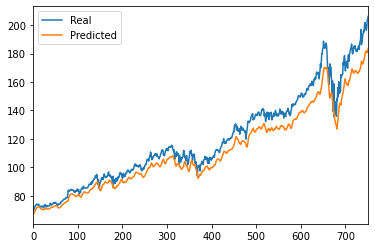

In [41]:
# Plot the real vs predicted prices as a line chart
stocks.plot()

In [42]:
stocks

,Real,Predicted
0,69.98,67.285477
1,69.99,67.673111
2,71.15,68.007072
3,71.77,68.610298
4,72.78,69.264618
5,73.35,70.052711
6,73.30,70.795860
7,73.86,71.288795
8,74.22,71.743141
9,73.79,72.118843
